In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

#plt.style.use('tableau-colorblind10')
sns.set(font_scale=1.3)
%matplotlib widget

In [97]:
#Number of agents
N = 4

## Load data

In [98]:
df = pd.read_table("simulation_params_N4C05a1.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency','info_per_agent','int_entropy'])
df

,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy
0,204.76250,39.259389,0.205423,0.039387,0.669951,0.200000,2.25,0.988210
1,189.25625,58.940809,0.172981,0.053872,0.686186,0.333333,0.00,0.979546
2,178.07500,148.909861,0.133057,0.111264,0.359491,0.100000,500.50,0.977663
3,183.41250,51.489364,0.191937,0.053881,0.649693,0.333333,750.75,0.981053
4,242.56250,0.264754,0.249678,0.000273,0.250000,0.500000,1.00,0.998004
...,...,...,...,...,...,...,...,...
596,155.99375,90.044173,0.146746,0.084704,0.527636,0.500000,0.25,0.971636
597,60.87500,105.438593,0.062500,0.108253,0.250000,0.500000,0.25,0.404829
598,234.00000,1.614117,0.248012,0.001711,0.250000,0.500000,1.00,0.997627
599,122.33250,77.671593,0.144687,0.091865,0.496629,1.000000,1.50,0.939661


In [99]:
df['efficiency'].describe()

count    601.000000
mean     180.802372
std       48.888369
min        0.000000
25%      143.681250
50%      182.843750
75%      221.137500
max      243.812500
Name: efficiency, dtype: float64

In [100]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [101]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

In [102]:
#df[(df['efficiency']<201) & (df['inequality']<50) & (df['info_per_agent']<=1)]

In [103]:
#df[(df['efficiency']>201) & (df['inequality']>200) & (df['entropy']<=0.1)]

In [104]:
#Filter out data where all agents choose 0 always or all agents choose 1 always
df = df[(df['int_entropy']>0) & (df['info_per_agent']<=N)].reset_index()
df

,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy
0,0,204.762500,39.259389,0.205423,0.039387,0.669951,0.200000,2.25,0.988210
1,1,189.256250,58.940809,0.172981,0.053872,0.686186,0.333333,0.00,0.979546
2,4,242.562500,0.264754,0.249678,0.000273,0.250000,0.500000,1.00,0.998004
3,5,243.687500,243.687500,0.125000,0.125000,0.000000,1.000000,0.00,0.998004
4,6,186.728125,51.953811,0.192062,0.053438,0.577943,0.166667,2.00,0.979810
...,...,...,...,...,...,...,...,...,...
478,596,155.993750,90.044173,0.146746,0.084704,0.527636,0.500000,0.25,0.971636
479,597,60.875000,105.438593,0.062500,0.108253,0.250000,0.500000,0.25,0.404829
480,598,234.000000,1.614117,0.248012,0.001711,0.250000,0.500000,1.00,0.997627
481,599,122.332500,77.671593,0.144687,0.091865,0.496629,1.000000,1.50,0.939661


## Plot data

<Axes: xlabel='n_efficiency', ylabel='n_inequality'>

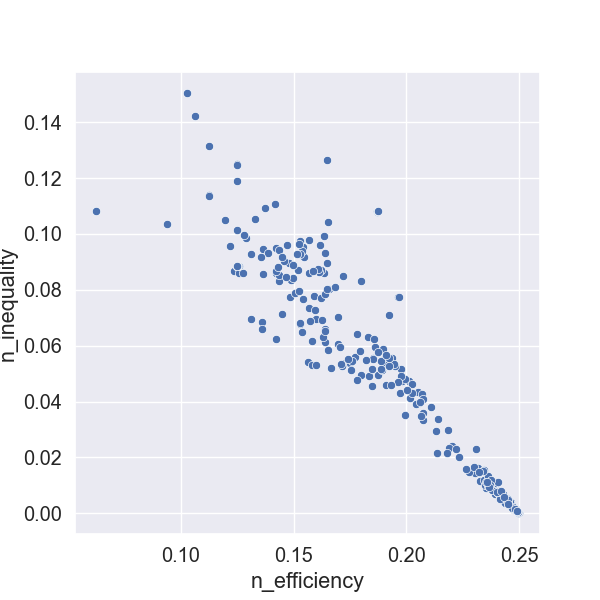

In [105]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='n_efficiency', y='n_inequality')

## Standardize data

In [106]:
#df_std = df[['n_efficiency','n_inequality','entropy','info_per_agent']].apply(lambda x: x-np.mean(x))
#df_std = df_std.apply(lambda x: x/np.std(x))
#df_std.head()

In [107]:
#X_dat = df_std.to_numpy()
#X_dat.shape

In [108]:
df_red = df[['n_efficiency','n_inequality','entropy','info_per_agent']]
scaler = MinMaxScaler()
scaler.fit(df_red)
X_dat = scaler.transform(df_red)
X_dat.shape

(483, 4)

# 2D

## t-sne

In [109]:
lab1 = 'efficiency'
lab2 = 'entropy'
lab3 = 'inequality'
lab4 = 'info_per_agent'

In [110]:
from sklearn.manifold import TSNE

In [111]:
# Get t-sne embeding with 2 dimensions
tsne = TSNE(2,perplexity=30,random_state=123)
tsne_result = tsne.fit_transform(X_dat)
tsne_result.shape

(483, 2)

In [112]:
df_tsne_res = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
df_tsne_res = df_tsne_res.join(df)
df_tsne_res.head()

,tsne_1,tsne_2,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy
0,18.591311,22.302925,0,204.762500,39.259389,0.205423,0.039387,0.669951,0.200000,2.25,0.988210
1,5.140222,-4.472719,1,189.256250,58.940809,0.172981,0.053872,0.686186,0.333333,0.00,0.979546
2,28.854372,-27.103170,4,242.562500,0.264754,0.249678,0.000273,0.250000,0.500000,1.00,0.998004
3,-46.290707,-13.088077,5,243.687500,243.687500,0.125000,0.125000,0.000000,1.000000,0.00,0.998004
4,14.966203,24.800798,6,186.728125,51.953811,0.192062,0.053438,0.577943,0.166667,2.00,0.979810


In [113]:
#df_tsne_res[(df_tsne_res['tsne_1']>-25) & (df_tsne_res['tsne_1']<-5) & (df_tsne_res['tsne_2']>-60) & (df_tsne_res['tsne_2']<-40)]

## Plot results

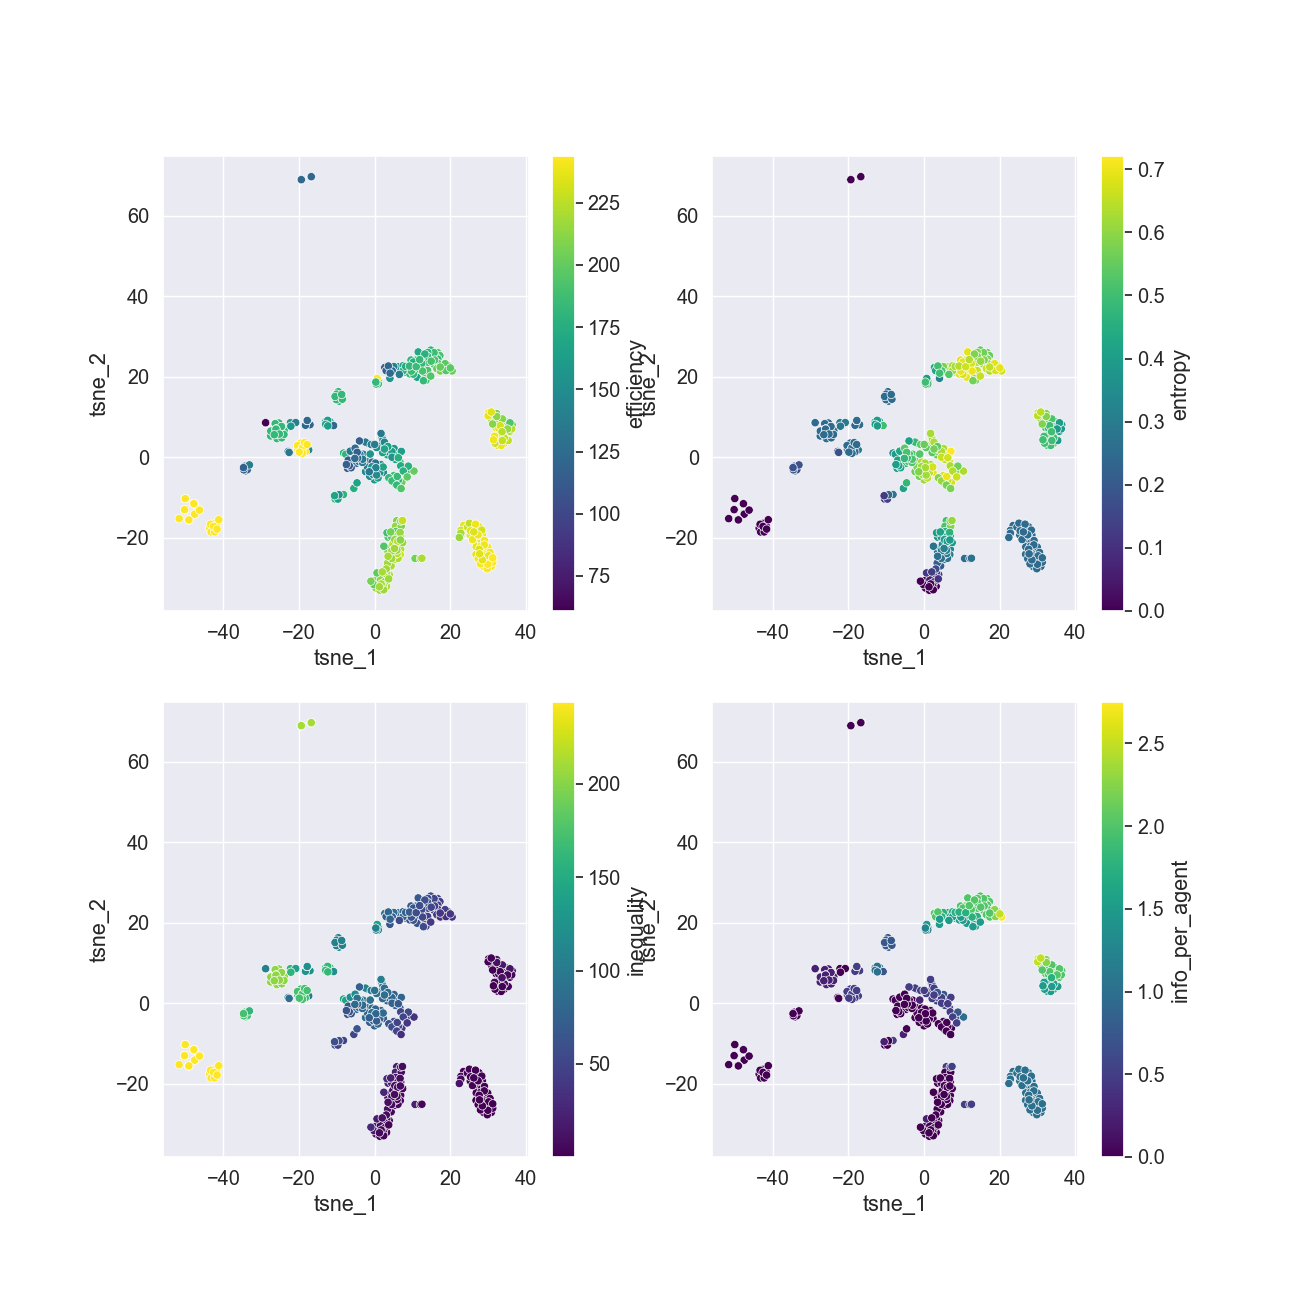

In [114]:
#2D plots
fig1, axis = plt.subplots(nrows=2, ncols=2, figsize=(13,13))

ax1 = sns.scatterplot(data=df_tsne_res, ax=axis[0][0], x='tsne_1', y='tsne_2', hue=lab1, palette='viridis')
norm1 = plt.Normalize(df_tsne_res[lab1].min(), df_tsne_res[lab1].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
ax1.get_legend().remove()
cb1 = plt.colorbar(mappable=sm1, ax=ax1)
cb1.set_label(lab1)

ax2 = sns.scatterplot(data=df_tsne_res, ax=axis[0][1], x='tsne_1', y='tsne_2', hue=lab2, palette='viridis')
norm2 = plt.Normalize(df_tsne_res[lab2].min(), df_tsne_res[lab2].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
ax2.get_legend().remove()
cb2 = plt.colorbar(mappable=sm2, ax=ax2)
cb2.set_label(lab2)

ax3 = sns.scatterplot(data=df_tsne_res, ax=axis[1][0], x='tsne_1', y='tsne_2', hue=lab3, palette='viridis')
norm3 = plt.Normalize(df_tsne_res[lab3].min(), df_tsne_res[lab3].max())
sm3 = plt.cm.ScalarMappable(cmap="viridis", norm=norm3)
sm3.set_array([])
ax3.get_legend().remove()
cb3 = plt.colorbar(mappable=sm3, ax=ax3)
cb3.set_label(lab3)

ax4 = sns.scatterplot(data=df_tsne_res, ax=axis[1][1], x='tsne_1', y='tsne_2', hue=lab4, palette='viridis')
norm4 = plt.Normalize(df_tsne_res[lab4].min(), df_tsne_res[lab4].max())
sm4 = plt.cm.ScalarMappable(cmap="viridis", norm=norm4)
sm4.set_array([])
ax4.get_legend().remove()
cb4 = plt.colorbar(mappable=sm4, ax=ax4)
cb4.set_label(lab4)

# 3D

## t-sne

In [115]:
# Get t-sne embeding with 3 dimensions
tsne3 = TSNE(3,perplexity=30,random_state=123)
tsne_result3 = tsne3.fit_transform(X_dat)
tsne_result3.shape

(483, 3)

In [116]:
df_tsne_res3 = pd.DataFrame({'tsne_1': tsne_result3[:,0], 'tsne_2': tsne_result3[:,1], 'tsne_3': tsne_result3[:,2]})
df_tsne_res3 = df_tsne_res3.join(df)
df_tsne_res3.head()

,tsne_1,tsne_2,tsne_3,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy
0,28.841221,25.567015,15.187300,0,204.762500,39.259389,0.205423,0.039387,0.669951,0.200000,2.25,0.988210
1,14.419500,15.726337,-30.216467,1,189.256250,58.940809,0.172981,0.053872,0.686186,0.333333,0.00,0.979546
2,31.777287,-27.729300,6.140265,4,242.562500,0.264754,0.249678,0.000273,0.250000,0.500000,1.00,0.998004
3,-9.753130,-36.735504,16.331324,5,243.687500,243.687500,0.125000,0.125000,0.000000,1.000000,0.00,0.998004
4,15.958057,25.285135,16.223000,6,186.728125,51.953811,0.192062,0.053438,0.577943,0.166667,2.00,0.979810


## Plot results

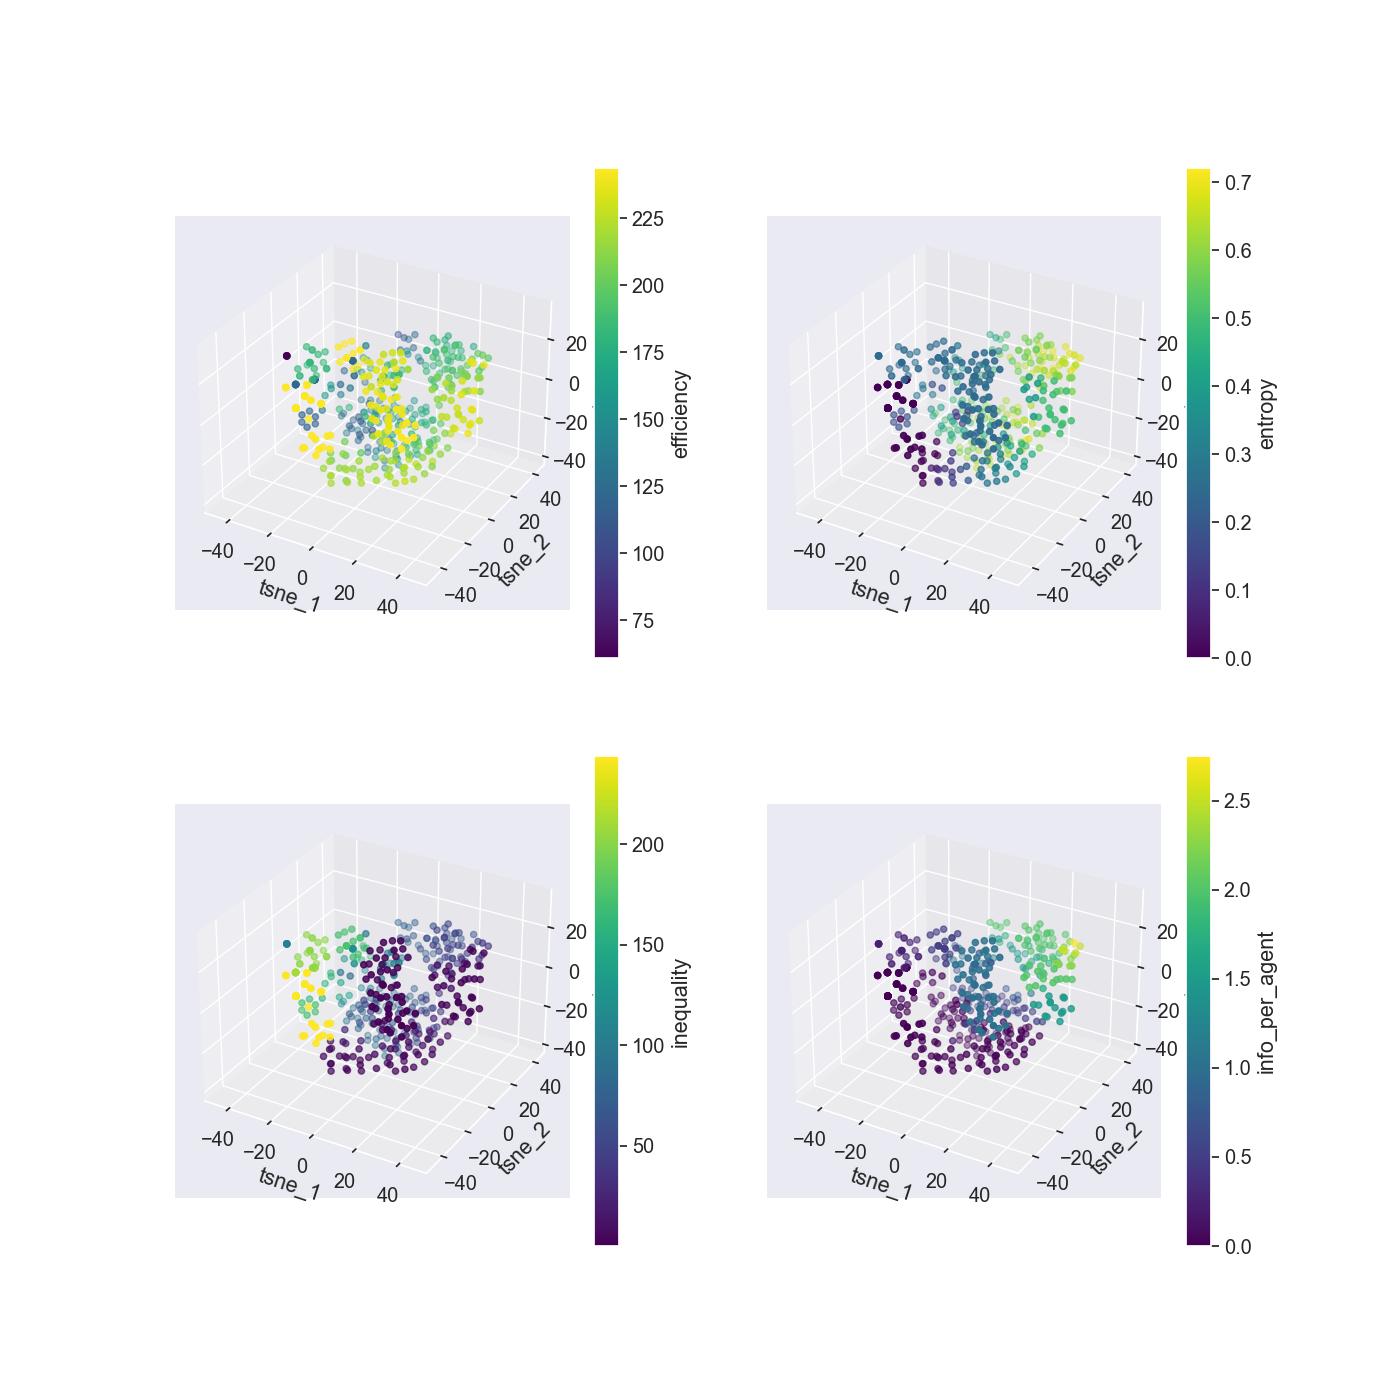

In [117]:
#3D plots

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1,projection='3d')
fig.add_axes(ax1)
sc1 = ax1.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab1], cmap='viridis')#, vmin=-200, vmax=200)
ax1.set_xlabel('tsne_1')
ax1.set_ylabel('tsne_2')
ax1.set_zlabel('tsne_3')
cbar1 = plt.colorbar(sc1)
cbar1.set_label(lab1)

ax2 = fig.add_subplot(2,2,2,projection='3d')
fig.add_axes(ax2)
sc2 = ax2.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab2], cmap='viridis')
ax2.set_xlabel('tsne_1')
ax2.set_ylabel('tsne_2')
ax2.set_zlabel('tsne_3')
cbar2 = plt.colorbar(sc2)
cbar2.set_label(lab2)

ax3 = fig.add_subplot(2,2,3,projection='3d')
fig.add_axes(ax3)
sc3 = ax3.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab3], cmap='viridis')
ax3.set_xlabel('tsne_1')
ax3.set_ylabel('tsne_2')
ax3.set_zlabel('tsne_3')
cbar3 = plt.colorbar(sc3)
cbar3.set_label(lab3)

ax4 = fig.add_subplot(2,2,4,projection='3d')
fig.add_axes(ax4)
sc4 = ax4.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab4], cmap='viridis')
ax4.set_xlabel('tsne_1')
ax4.set_ylabel('tsne_2')
ax4.set_zlabel('tsne_3')
cbar4 = plt.colorbar(sc4)
cbar4.set_label(lab4)



#plt.show()

In [118]:
#af = AffinityPropagation(damping=0.8,max_iter=3000,preference=-3, random_state=0).fit(X_dat)
#cluster_centers_indices = af.cluster_centers_indices_
#labels = af.labels_
#n_clusters = len(cluster_centers_indices)
#n_clusters, len(np.unique(labels))

In [119]:
##3D plot clustering
#lab = 'labels'

#fig0 = plt.figure(figsize=(8,8))
#ax = Axes3D(fig0)
#fig0.add_axes(ax)

#sc = ax.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=labels, cmap='Paired')#cmap='tab20')
#ax.set_xlabel('tsne_1')
#ax.set_ylabel('tsne_2')
#ax.set_zlabel('tsne_3')
#cbar = plt.colorbar(sc)
#cbar.set_label(lab)

##plt.show()